<a href="https://colab.research.google.com/github/ThackerParth/mlp_from_scrath/blob/master/Group4_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [0]:
X_train=pd.read_csv('data_set_ALL_AML_train.csv')
X_train.shape

(7129, 78)

In [0]:
y=pd.read_csv('actual.csv')
y.shape

(72, 2)

In [0]:
X_test=pd.read_csv('data_set_ALL_AML_independent.csv')
X_test.shape

(7129, 70)

In [0]:
X_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [0]:
# 1)  Remove "call" columns from training and test
train_keepers = [col for col in X_train.columns if "call" not in col]
test_keepers = [col for col in X_test.columns if "call" not in col]
X_train = X_train[train_keepers]
X_test = X_test[test_keepers]

In [0]:
X_train.shape,X_test.shape

((7129, 40), (7129, 36))

In [0]:
# 2) Transpose
X_train = X_train.T
X_test = X_test.T
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [0]:
X_train.shape

(40, 7129)

In [0]:
# 3) Clean up the column names for training data
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [0]:
X_train.shape,X_test.shape

((38, 7129), (34, 7129))

In [0]:
# 4) Split into train and test 
X_train = X_train.reset_index(drop=True)
print(X_train.shape)
y_train = y[y.patient <= 38].reset_index(drop=True)
# Subet the rest for testing
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)

(38, 7129)


## Scale data

In [0]:
X = X_train.append(X_test)

In [0]:
X = X.reset_index(drop=True)

In [0]:
scaler = MinMaxScaler()
X_scl = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
X_scl.shape

(72, 7129)

In [0]:
y = y['cancer']

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Model Classes

Neuron Class

In [0]:
class Neuron:
    
    def __init__(self, weights=[], bias=1, dim=0, activation_fn = 'sig'):
        self.weights = weights
        self.bias = 1
        #self.wieghts = np.insert(np.array(self.weights),len(self.weights), bias)
        self.input_dim = dim
        self.act_fn = activation_fn
    def relu(self,x):
        if x>0:
            return float(x)
        else:
            return float(0)
        
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-1.0 *x))
    def _act_function(self, ws):
        if self.act_fn == 'sig':
            return self.sigmoid(ws)
        elif self.act_fn == 'relu':
            return self.relu(ws)
    def assign_bias(self,b):
        self.bias = b
    def wt_sum(self, x):
        w = np.multiply(np.array(self.weights, dtype = 'float64') , np.array(x, dtype = 'float64'))
        return np.sum(w)
    def assign_w(self, weights):
        self.weights = weights
    def propagate(self, x):
        p = self.wt_sum(x) + self.bias
        return self._act_function(p) , p

Layer Class

In [0]:
class Layer:
    
    def __init__(self, n=1, prev = 0, activation_fn = 'sig'):
        self.no_neuron = n
        self.prev_layer = prev
        self.neurons = []
        self.activation_fn = activation_fn
        for i in range(n):
            neu = Neuron(dim = prev,bias = 1,activation_fn = activation_fn)
            self.neurons.append(neu)
    def weights(self):
        we = []
        for neu in self.neurons:
            we.append(neu.weights)
        return np.array(we)
    def weight_mat(self, w):
        for i in range(self.no_neuron):
            self.neurons[i].assign_w(w[i])
    def assign_b(self,b):
        for i in range(self.no_neuron):
            self.neurons[i].assign_bias(b[i])
    def biases(self):
        we = []
        for neu in self.neurons:
            we.append(neu.bias)
        return np.array(we)
    #Generate output for the layer
    def generate(self, inputs):
        output = []
        z = []
        for i in range(self.no_neuron):
            o,zz = self.neurons[i].propagate(inputs)
            output.append(o)
            z.append(zz)
        self.output = np.array(output)
        return self.output , np.array(z)

Neural Network (Main Class)

In [0]:
class NeuralNetwork:
    
    def __init__ (self, learning_rate = 0.01, no_input=1, no_output=1, no_hidden_layers=1, hidden_dim=[40], batch_siz = 1, h_act = ['relu'], o_act = 'sig', random_state = 42):
        self.learning_rate = learning_rate
        self.no_input = no_input
        self.no_output = no_output
        self.no_hidden_layers = no_hidden_layers
        self.hidden_dim = hidden_dim
        self.batch_siz = batch_siz
        np.random.seed(random_state)
        # Initialize Hidden layer
        self.hidden_layer = list()
        self.hidden_layer.append(Layer(n = self.hidden_dim[0],prev = self.no_input, activation_fn = h_act[0]))
        
        # Initialize weights and bias for hidden and outplut layers
        
        self.hidden_layer[0].weight_mat(w=np.random.randn(self.hidden_dim[0],self.no_input)*0.01)
        self.hidden_layer[0].assign_b(b=np.zeros(self.hidden_dim[0]))
        for i in range(1,self.no_hidden_layers):
            self.hidden_layer.append(Layer(n = self.hidden_dim[i],prev = self.hidden_dim[i-1], activation_fn = h_act[i]))
            self.hidden_layer[i].weight_mat(w=np.random.randn(self.hidden_dim[i],self.hidden_dim[i-1])*0.01)
            self.hidden_layer[i].assign_b(b=np.zeros(self.hidden_dim[i]))
        
        self.output_layer = Layer(n = self.no_output, prev = self.hidden_dim[-1], activation_fn = o_act)
        self.output_layer.weight_mat(w=np.random.randn(self.no_output,self.hidden_dim[-1])*0.01)
        self.output_layer.assign_b(b=np.zeros(self.no_output))
    
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-1.0 * np.array(x)))
        
    def feedForward(self, inputs):
        # Feed forward the input row to the first hidden layer and the subsequent network
        # Return the output of each layer and Weighted sum for each layer
        ai = list()
        zi = list()
        hiddenl_i = inputs
        hiddenl_o = None
        for lay in self.hidden_layer:
            hiddenl_o, z = lay.generate(hiddenl_i)
            ai.append(hiddenl_o)
            zi.append(z)
            hiddenl_i = hiddenl_o
        outputl_o, z = self.output_layer.generate(hiddenl_o)
        ai.append(outputl_o)
        zi.append(z)
        return ai,zi
    
    def der_of_act(self,layer,a):
        
        #Calculates the output according to the derivative of the activation function
        
        if layer.activation_fn == 'sig':
            return np.array(self.sigmoid(a))*(1.0 - np.array(self.sigmoid(a)))
        elif layer.activation_fn == 'relu':
            d = []
            for x in a:
                if x>0:
                    d.append(1.0)
                else:
                    d.append(0.0)
            return np.array(d)
    def der_of_cost(self,layer,a, y):
        
        #Calculates the output according to the derivative of the cost function
        
        if layer.activation_fn == 'relu':
            return np.subtract(np.array(a), np.array(y))
        elif layer.activation_fn == 'sig':
            return (np.subtract(np.array(a), np.array(y))) / (np.array(a)*(1.0 - np.array(a)))
        
    def delt(self, x_train, y_train,lamda):
        ai,zi = self.feedForward(x_train)
        err = list()
        
        # Calculate the Error term for output layer
        err.append(np.subtract(ai[-1],y_train))
        
        # Propagate the error backwards into the hidden layers
       
        w_o = self.output_layer.weights()
        e = np.multiply(np.dot(err[0].reshape(1,self.no_output),w_o), self.der_of_act(self.hidden_layer[-1],zi[-2]))
        err.insert(0,e.reshape(1,self.hidden_dim[-1]))
        for i in range(2, self.no_hidden_layers+1):
            w_h = self.hidden_layer[-i+1].weights()
            e = np.multiply(np.dot(err[0].reshape(1,self.hidden_dim[-i+1]),w_h), self.der_of_act(self.hidden_layer[-i],zi[-i-1]) )
            err.insert(0,e.reshape(1,self.hidden_dim[-i]))
            
        # Calculate delta J/ del Weights
        delta = []
        newl = list()
        newl.extend(self.hidden_layer)
        newl.append(self.output_layer)
        delta.append(self.learning_rate * np.add(np.dot(err[0].T, x_train[np.newaxis]),(lamda*self.hidden_layer[0].weights())))
        for i in range(1,len(err)):
            delta.append(self.learning_rate * np.add(np.dot(err[i].T, ai[i-1][np.newaxis]) , (lamda*newl[i].weights())) )
        
        # Return deltas and errors for each layer
        return delta, err
    
    def fit(self, X , y, no_epochs,lamda):
        epoch = 1
        eper = {}
        er = {}
        if no_epochs is None:
            epoch = 1
        else:
            epoch = no_epochs
            
        # Train for each epoch
        for ep in range(epoch):
            q = 0
            
            # Calculate Delta and erors in batches of the batch_siz
            
            for i in range(int(len(X)/self.batch_siz)):
                d = None
                e = None
                rmse = 0
                for j in range(self.batch_siz):
                    delta, err = self.delt(X[q],y[q], lamda)
                    if d == None:
                        d = delta
                        e = err
                    else:
                        for k in range(len(d)):
                            d[k] = np.add(d[k] , delta[k])
                        for k in range(len(e)):
                            e[k] = np.add(e[k] , err[k])
                    err[-1] = np.array(err[-1]) ** 2
                    rmse = rmse +  np.sum(err[-1])
                    q = q+1

                for l in range(len(d)):
                    d[l] = d[l] / self.batch_siz
                for l in range(len(e)):
                    e[l] = (np.divide(e[l], self.batch_siz) * self.learning_rate)
                rmse = rmse / self.batch_siz
                er.update({(ep*len(X))+q:rmse})
                
                eper.update({(ep*len(X))+q:np.mean(list(er.values()))})
                
                ##Weight and bias update for hidden and output layer
                
                for m in range(self.no_hidden_layers):
                    self.hidden_layer[m].weight_mat(np.subtract(self.hidden_layer[m].weights(),d[m]))
                    
                    bi = np.subtract(self.hidden_layer[m].biases()[np.newaxis],e[m]).reshape(self.hidden_dim[m],)

                    self.hidden_layer[m].assign_b(bi)
                self.output_layer.weight_mat(np.subtract(self.output_layer.weights(),d[-1]))
                self.output_layer.assign_b(np.subtract(self.output_layer.biases(),e[-1]))
        
        # Return mean RMSE for each training example for each epoch
        return eper
    
    def predict(self, X):
        y = []
        for x in X:
            ai,xi = self.feedForward(x)
            y.append(ai[-1])
        y = np.array(y)
        return y  
    def predict_class(self, X):
        
        #Predict class in case of Sigmoid output layer with threshold set to 0.5
        
        y = self.predict(X)
        for i in range(len(y)):
            if y[i]>0.5:
                y[i] = 1
            else:
                y[i] = 0
        return y

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_scl, y, test_size = 0.33, random_state = 42) 

## Creating and training the model

In [0]:
nn = NeuralNetwork(no_input=7129, no_hidden_layers= 2, hidden_dim=[50,50], h_act = ['relu','relu'], o_act = 'sig', batch_siz = 1)
er = nn.fit(X_train, y_train, no_epochs = 1000,lamda = 0.01)

Checking The validation Accuracy Score

In [0]:
from sklearn.metrics import accuracy_score
pred = nn.predict_class(X_test)

acc = accuracy_score(y_true = y_test, y_pred = pred)
print(acc)

0.8333333333333334


## Graph of Error vs Training examples

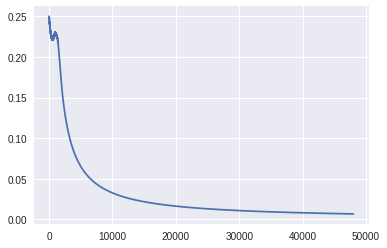

In [0]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(list(er.keys()), list(er.values()))
plt.show()